This is the data exploration part, please change the data input pathway when run the code. 

In [2]:
import os
import numpy as np
import skimage
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import numpy.linalg as linalg
import cmath
from skimage.io import imread,imshow
from skimage.color import rgb2gray 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier

## Import Data

In [3]:
# Upload all images in a multidimensional array (Number of images x Height x Width x Channels):

path_faces = 'C:/Users/belki/Documents/MSc/02582 Computational Data Analysis - Spring 2022/case2/data/data/data/Faces'
path_labels = 'C:/Users/belki/Documents/MSc/02582 Computational Data Analysis - Spring 2022/case2/data/data/data/labels.csv'

def load_images(folder):
    images = []
    # n_imgs = len(os.listdir(folder))  
    n_imgs = 500
    for filename in range(n_imgs):
        img = mpimg.imread(os.path.join(folder, str(filename)+'.jpg'))
        if img is not None:
            images.append(img)
    return images

dataimgs = np.array(load_images(path_faces))

# labels on 'age', 'gender', and 'race' diven for each image. 

labels = pd.read_csv(path_labels,names=['age','gender','race'])

# We do not need the information in 'filenames.txt'

## Data Profilling

Run this part if you want to have the data summary. Change the output file directory. 

In [5]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(labels)
#prof.to_file(output_file='C:/Users/belki/Documents/MSc/02582 Computational Data Analysis - Spring 2022/case2/output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Gender and Race Distribution

In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     23705 non-null  int64
 1   gender  23705 non-null  int64
 2   race    23705 non-null  int64
dtypes: int64(3)
memory usage: 555.7 KB


<Figure size 1080x576 with 0 Axes>

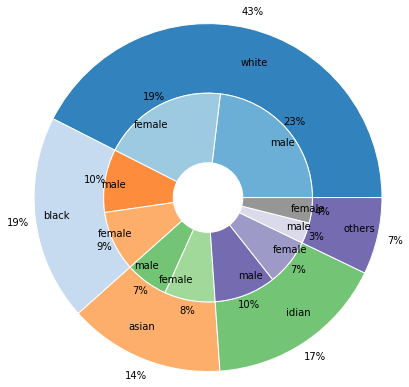

In [141]:
from matplotlib.pyplot import figure
figure(figsize=(15, 8))
fig, ax = plt.subplots()

size = 0.8

race = ['white', 'black', 'asian', 'idian', 'others']

data = np.zeros((len(race), 2))

for i in range(len(race)):
    male = labels[(labels['race'] == i) & (labels['gender'] == 0)]
    female = labels[(labels['race'] == i) & (labels['gender'] == 1)]
    data[i] = [len(male), len(female)]
    i += 1


# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(race))*3)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17]))

ax.pie(data.sum(axis=1), 
                     radius=2, 
                     colors=outer_colors, 
                     wedgeprops=dict(width=size, edgecolor='w'), 
                     labels = race, 
                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.8)

ax.pie(data.flatten(), 
       radius=2-size, 
       colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels = ['male', 'female']*len(race), 
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=0.8)

#ax.set(aspect="equal", title='Race and Gender Distribution')
#plt.title('Race and Gender Distribution')#, fontsize=18, pad=15)
plt.show()

The color of the inner circle does not match with the outer circle, but the values and ratios are correct.

## Age and Race Distribution 

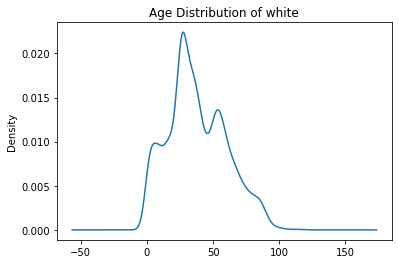

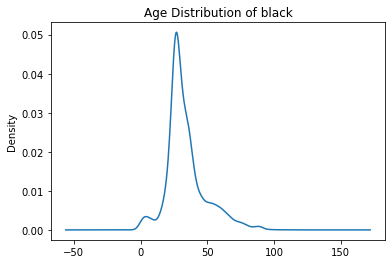

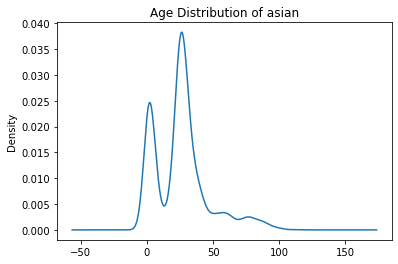

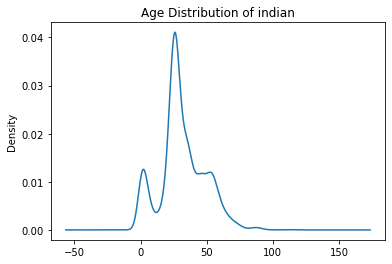

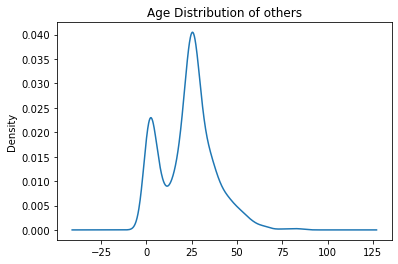

In [163]:
race_dict = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
for i in range(len(race)):
    labels[labels['race'] == i]['age'].plot.density()
    title = 'Age Distribution of ' + race_dict[i]
    plt.title(title)
    plt.show()

## Random Sample

As clearly shown in the above pie chart, the race distribution is uneven. In order to have evenly distributed number in each race for further study, equal amount of random samples are taken from each race group. 

In [132]:
max = len(labels[labels['race'] == 4])
print('Max number of smaple for each race: {}'.format(max))
print('Max total number of sample can be used: {}'.format(max*5))

Max number of smaple for each race: 1692
Max total number of sample can be used: 8460


In [174]:
number_of_sample = max
random_white = (labels[labels['race'] == 0]).sample(n = max)
random_black = (labels[labels['race'] == 1]).sample(n = max)
random_asian = (labels[labels['race'] == 2]).sample(n = max)
random_indian = (labels[labels['race'] == 3]).sample(n = max)
random_others = (labels[labels['race'] == 4]).sample(n = max)

print("Number of white in random sample: {}".format(len(random_white)))
print("Number of black in random sample: {}".format(len(random_black)))
print("Number of asian in random sample: {}".format(len(random_asian)))
print("Number of indian in random sample: {}".format(len(random_indian)))
print("Number of others in random sample: {}".format(len(random_others)))

Number of white in random sample: 1692
Number of black in random sample: 1692
Number of asian in random sample: 1692
Number of indian in random sample: 1692
Number of others in random sample: 1692


We can investigate the gender and age distribution in each race by the following code. 

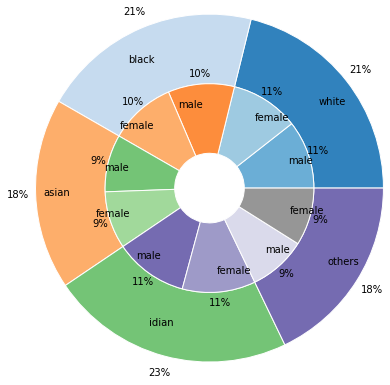

In [175]:
from matplotlib.pyplot import figure
#figure(figsize=(15, 8))
fig, ax = plt.subplots()

size = 0.8

race = ['white', 'black', 'asian', 'idian', 'others']
random_data_list = [random_white, random_black, random_asian, random_indian, random_others]

data = np.zeros((len(race), 2))

for i in range(len(random_data_list)):
    random_race = random_data_list[i]
    male = random_race[random_race['gender'] == 0]
    female = random_race[random_race['gender'] == 0]
    data[i] = [len(male), len(female)]
    i += 1


# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(race))*3)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17]))

ax.pie(data.sum(axis=1), 
                     radius=2, 
                     colors=outer_colors, 
                     wedgeprops=dict(width=size, edgecolor='w'), 
                     labels = race, 
                     autopct='%1.0f%%', pctdistance=1.1, labeldistance=0.8)

ax.pie(data.flatten(), 
       radius=2-size, 
       colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels = ['male', 'female']*len(race), 
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=0.8)

#ax.set(aspect="equal", title='Race and Gender Distribution')
#plt.title('Random Race and Gender Distribution')#, fontsize=18, pad=15)
plt.show()

The color of the inner circle does not match with the outer circle, but the values and ratios are correct. 

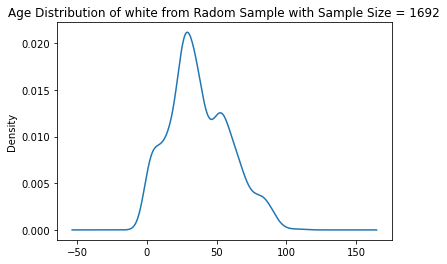

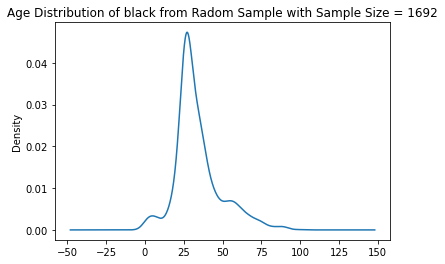

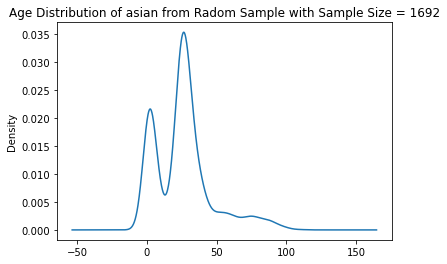

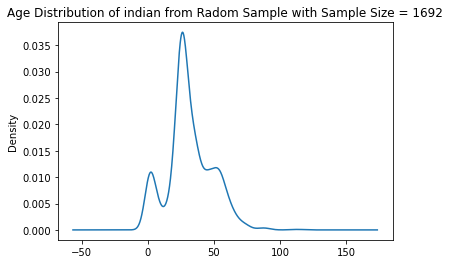

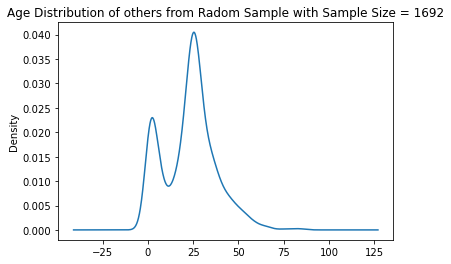

In [183]:
race_dict = {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}
for i in range(len(race)):
    random_race = random_data_list[i]
    random_race['age'].plot.density()
    #labels[labels['race'] == i]['age'].plot.density()
    title = 'Age Distribution of ' + race_dict[i] + ' from Radom Sample with Sample Size = ' + str(max)
    plt.title(title)
    plt.show()